# Nataf Transformation: Example 2 - Correlated Random Variables

Author: Michael D. Shields

Date: July 15, 2018

Import necessary modules

In [1]:
from UQpy.SampleMethods import MCS, Nataf, Correlate
import numpy as np
import matplotlib.pyplot as plt

Part 1: Generate independent standard normal variables using UQpy.MCS

In [2]:
x = MCS(dimension=2, dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)

Successful execution of MCS design..


Define the Gaussian correlation matrix of the random variables

In [3]:
Rho_G = np.array([[1.0, 0.9], [0.9, 1.0]])
print('Correlation matrix in the standard normal space')
print(Rho_G)

Correlation matrix in the standard normal space
[[ 1.   0.9]
 [ 0.9  1. ]]


Induce correlation in the standard normal samples

In [5]:
x_corr = Correlate(input_samples=x, corr_norm=Rho_G)

UQpy: Performing correlation of the samples...
UQpy: Done.


Transform the standard normal random variables to:

$\bullet$ Lognormal(1,2)

$\bullet$ Gamma(2,1, 2)

In [6]:
z = Nataf(input_samples=x_corr, dist_name=['Lognormal', 'Gamma'], dist_params=[[1, 2], [2, 1, 2]])

UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Performing Nataf transformation of the samples...
UQpy: Done.


Print the transformed correlation matrix

In [7]:
print('Correlation matrix in the transformed space')
print(z.corr)

Correlation matrix in the transformed space
[[ 1.          0.34287907]
 [ 0.34287907  1.        ]]


Plot the distribution of the transformed samples.

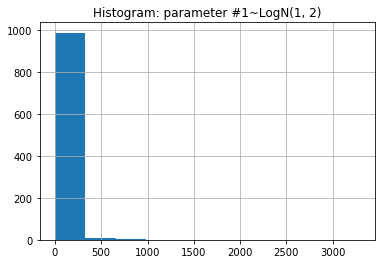

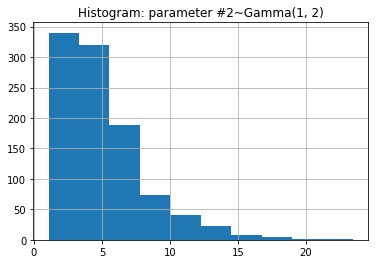

In [8]:
fig, ax = plt.subplots()
plt.title('Histogram: parameter #1~LogN(1, 2)')
plt.hist(z.samples[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram: parameter #2~Gamma(1, 2)')
plt.hist(z.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

Plot the samples in the standard normal and non-Gaussian spaces.

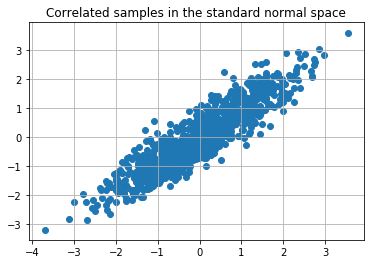

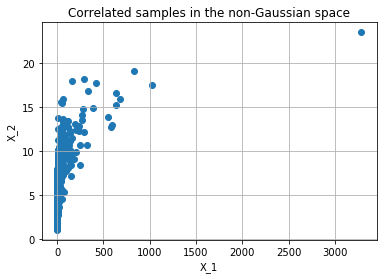

In [9]:
plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(z.samplesN01[:, 0], z.samplesN01[:, 1])
plt.grid(True)

   
plt.figure()
plt.title('Correlated samples in the non-Gaussian space')
plt.scatter(z.samples[:, 0], z.samples[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

Compute the correlation coefficient of the samples

In [10]:
c = np.corrcoef(z.samples, rowvar=False)
print('Correlation Coefficient: ', c)

Correlation Coefficient:  [[ 1.          0.50665203]
 [ 0.50665203  1.        ]]


Part 2: Define the samples as an array

In [11]:
x0 = np.random.multivariate_normal(np.zeros((2)), Rho_G, 1000)

Transform the standard normal random variables to:

$\bullet$ Lognormal(1,2)

$\bullet$ Gamma(2,1, 2)

In [12]:
z0 = Nataf(input_samples=x0, corr_norm=Rho_G, dist_name=['Lognormal', 'Gamma'], dist_params=[[1, 2], [2, 1, 2]], dimension=2)

UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Performing Nataf transformation of the samples...
UQpy: Done.


Print the transformed correlation

In [13]:
print('Correlation matrix in the transformed space')
print(z0.corr)

Correlation matrix in the transformed space
[[ 1.          0.34287907]
 [ 0.34287907  1.        ]]


Plot the distribution of the transformed samples.

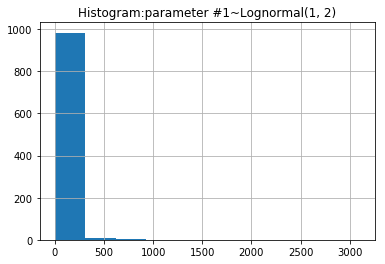

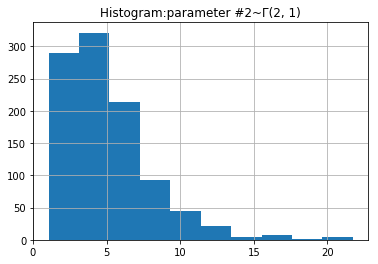

In [14]:
fig, ax = plt.subplots()
plt.title('Histogram:parameter #1~Lognormal(1, 2)')
plt.hist(z0.samples[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2~Γ(2, 1)')
plt.hist(z0.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

Plot the samples in the standard normal and non-Gaussian spaces.

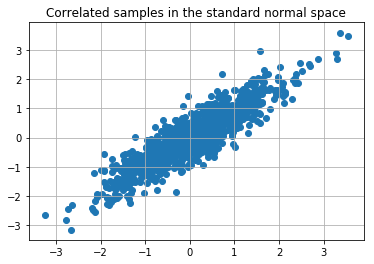

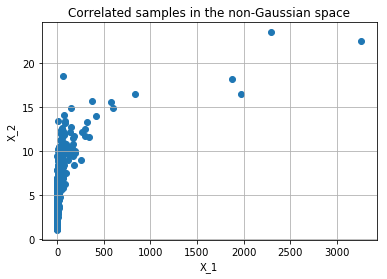

In [16]:
plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(z0.samplesN01[:, 0], z0.samplesN01[:, 1])
plt.grid(True)

plt.figure()
plt.title('Correlated samples in the non-Gaussian space')
plt.scatter(z0.samples[:, 0], z0.samples[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

Compute the correlation coefficient of the samples

In [17]:
c0 = np.corrcoef(z0.samples, rowvar=False)
print('Correlation Coefficient: ', c0)

Correlation Coefficient:  [[ 1.         0.5034869]
 [ 0.5034869  1.       ]]
